<a href="https://colab.research.google.com/github/Anou26/CIS563_HW3-4/blob/main/Hierarchical_Clustering_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM 6: HIERARCHICAL CLUSTERING**

**Submitted by**

**Name: Anoushka Mergoju**

**SUID: 328542442**

In [29]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Importing the dataset
data = pd.read_csv("/content/dim032_conv.csv")

In [3]:
data.head()

,A00,A01,A02,A03,A04,A05,A06,A07,A08,A09,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,A31
0,84,152,100,52,95,186,169,106,37,186,...,190,65,214,116,75,55,123,65,154,177
1,86,149,101,56,93,181,171,116,37,192,...,191,79,215,116,76,60,130,71,151,181
2,83,149,99,51,96,187,169,108,34,191,...,190,65,213,118,73,55,125,63,155,178
3,86,142,101,64,105,183,172,116,49,180,...,186,69,209,120,68,56,123,67,144,181
4,89,145,108,54,91,180,175,107,35,192,...,188,67,212,118,91,50,135,58,147,165


In [7]:
print(data.isnull())

        A00    A01    A02    A03    A04    A05    A06    A07    A08    A09  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1019  False  False  False  False  False  False  False  False  False  False   
1020  False  False  False  False  False  False  False  False  False  False   
1021  False  False  False  False  False  False  False  False  False  False   
1022  False  False  False  False  False  False  False  False  False  False   
1023  False  False  False  False  False  False  False  False  False  False   

      ...    A22    A23    A24    A25    A26    A27    A28    A

In [8]:
data.shape

(1024, 32)

**(i) Using k-means (you can directly use packages from sklearn, etc.) obtain clusters (try different k). Plot SSE changes with respect to k to obtain an optimal k using this plot (there is no universal answer and the answer might change with randomization).**

In [13]:
#Building the model
Model_arg = {"init":"random", "n_init":10, "max_iter":10, "random_state": 23}
ss_error = []

In [14]:
for k_value in range(1,30):
    Model_Kmeans = KMeans(n_clusters=k_value, **Model_arg)
    Model_Kmeans.fit(data)
    ss_error.append(Model_Kmeans.inertia_)

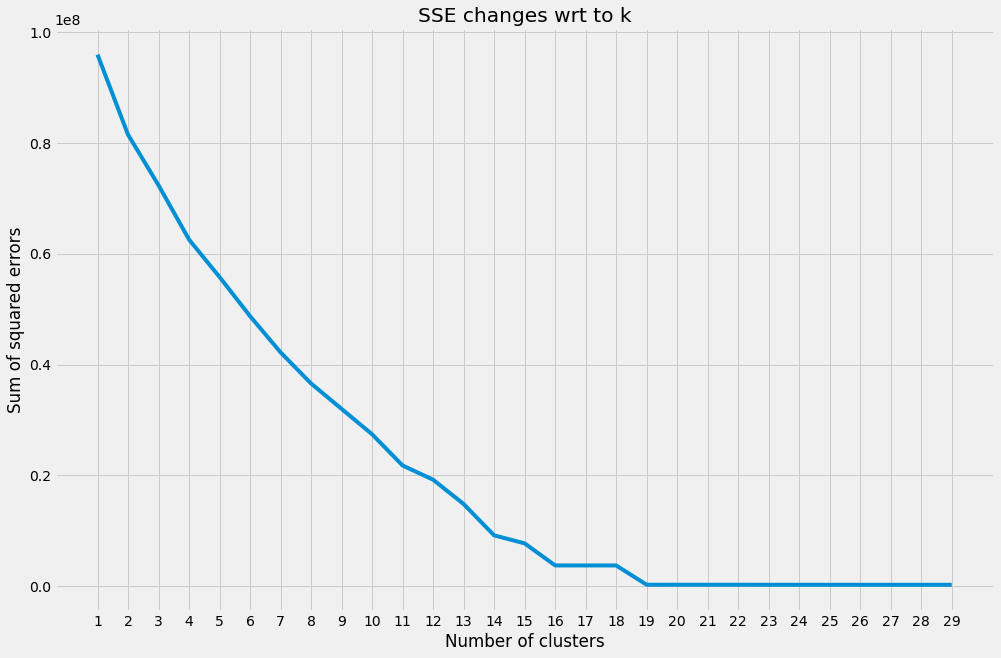

In [18]:
#Plotting the SSE changes with respect to k
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,10))
plt.plot(range(1,30), ss_error)
plt.xticks(range(1,30))
plt.title("SSE changes wrt to k")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared errors")
plt.show()

In [26]:
kmeans = KMeans(n_clusters=4, init ='random', max_iter=10, n_init=10,random_state=0 )
X=data.iloc[1:30].values
y_kmeans = kmeans.fit_predict(X)

**(ii) Using these optimal clusters, in each iteration, merge the two closest clusters based on their MIN/MAX/average distances. This can be implemented as a function that takes parameters**
**(iii)Track the merging history and plot the hierarchical clustering dendrograms (three dendrograms for min/max/average)**

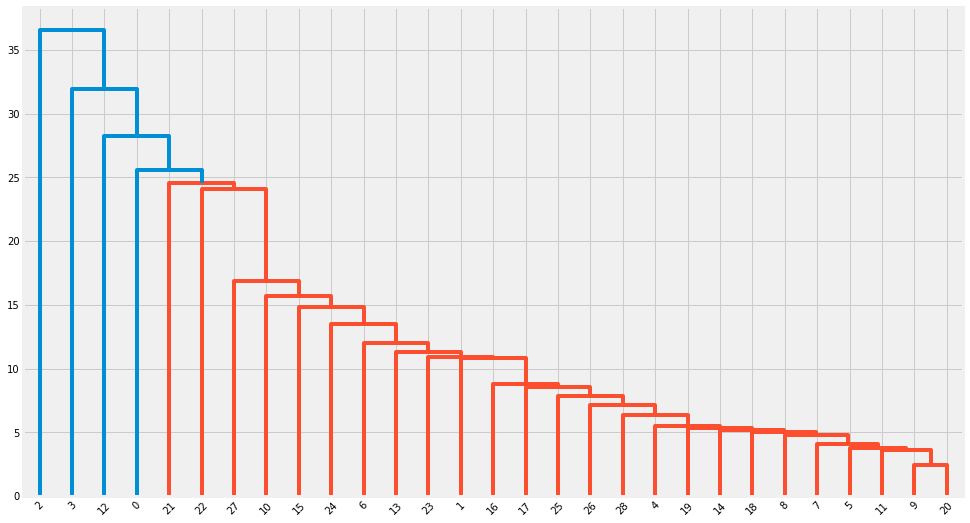

In [32]:
#MINIMUM
minimum=linkage(X,'single','euclidean')
fig=plt.figure(figsize=(15,9))
dendrogram(minimum)
plt.show()

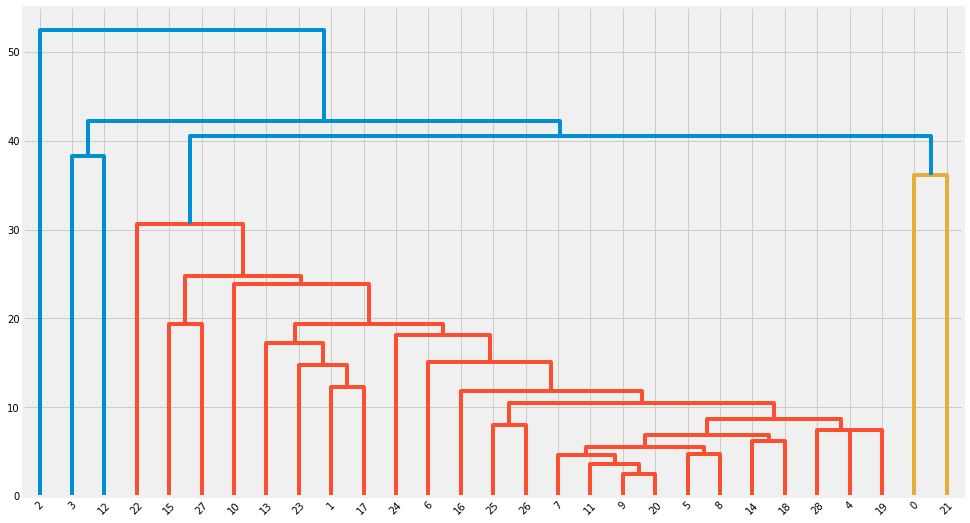

In [33]:
#MAXIMUM
maximum=linkage(X,'complete','euclidean')
fig=plt.figure(figsize=(15,9))
dendrogram(maximum)
plt.show()

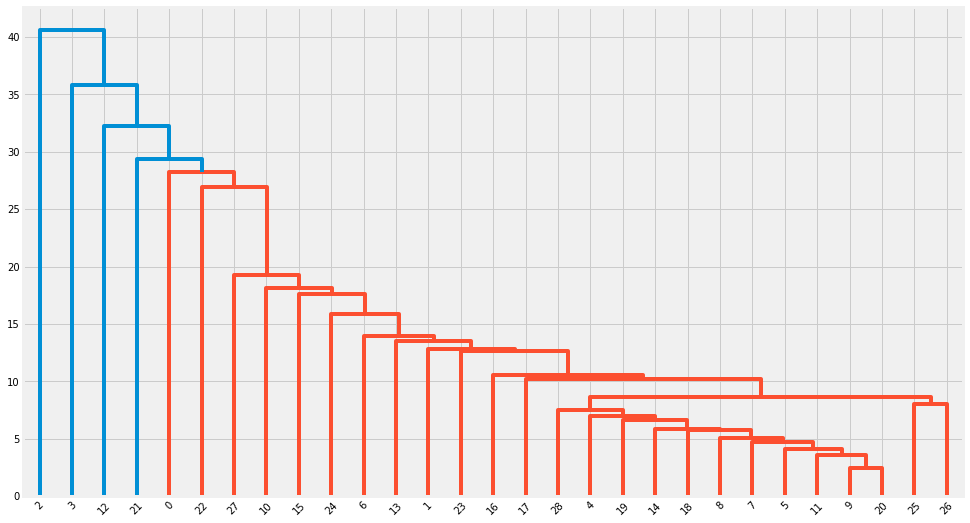

In [35]:
#AVERAGE
average=linkage(X,'average','euclidean')
fig=plt.figure(figsize=(15,9))
dendrogram(average)
plt.show()